In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras.layers import Rescaling

BATCH_SIZE = 64
IMG_SIZE = (128, 128) 
val_split = 0.3
# train_dir3 = r"C:/Users/james/Desktop/Diss_project_code/state-farm-distracted-driver-detection/imgs/train"
# train_dir2 =     r"C:/Users/james/Desktop/auc_distracted_driver_dataset_v2/v2_cam1_cam2_ split_by_driver/Camera 1/train/"
train_dir = r"C:/Users/james/Desktop/Diss_Code_for_AUC/auc_distracted_driver_dataset_v2/v2_cam1_cam2_split_by_driver/Camera_1/train/"
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE, 
                                             validation_split= val_split, 
                                             subset= "training", 
                                             seed = 1, 
                                             labels="inferred")

val_dataset = image_dataset_from_directory(train_dir,
                                           shuffle=True,
                                           batch_size=BATCH_SIZE,
                                           image_size=IMG_SIZE, 
                                           validation_split= val_split, 
                                           subset= "validation", 
                                           seed = 1, 
                                           labels="inferred")

Found 11678 files belonging to 10 classes.
Using 8175 files for training.
Found 11678 files belonging to 10 classes.
Using 3503 files for validation.


In [3]:
meta = {'c0': "Focussed",
         'c1' : "Text-Phone Right",
           'c2': "Talk-Phone Right", 
           'c3': "Text-Phone Left", 
           'c4': "Talk-Phone Left", 
           'c5': "Radio Adjust", 
           'c6': "Drinking", 
           'c7': "Back Seat Reach", 
           'c8': "Misc Manual", 
           'c9': "Visual"
}

In [4]:
# test_dir =     r"C:/Users/james/Desktop/auc_distracted_driver_dataset_v2/v2_cam1_cam2_ split_by_driver/Camera 1/test"
# test_dir1 = r"C:/Users/james/Desktop/Diss_project_code/state-farm-distracted-driver-detection/imgs/test"
# test_dataset = image_dataset_from_directory(test_dir,
#                                              shuffle=True,
#                                              batch_size=BATCH_SIZE,
#                                              image_size=IMG_SIZE, 
#                                              seed = 1, 
#                                              labels="inferred")

In [5]:
total_batches = len(val_dataset)
val_batches = int(total_batches*(2/3))
test_batches = total_batches-val_batches

val = val_dataset.take(val_batches)
test_dataset = val_dataset.skip(val_batches)

In [6]:
def normalize(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label
train_dataset = train_dataset.map(normalize)
val_dataset = val_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [7]:
import numpy as np
total_dict = {}
batch_number = 0
total_count = 0
for batch_images, batch_labels in val_dataset:
    batch_count = {}
    for cls_num in batch_labels.numpy().tolist():
        total_count += 1
        if cls_num in batch_count:
            batch_count[cls_num] += 1
        else:
            batch_count[cls_num] = 1 
    ordered_batch_count = dict(sorted(batch_count.items()))
    total_dict[batch_number] = ordered_batch_count
    batch_number += 1

In [8]:
total_count

3503

In [9]:
class_count = { 0: 2400,
               1: 862,
               2: 862,
               3: 744,
               4: 950,
               5: 753,
               6: 733,
               7: 691,
               8: 698,
               9: 1379
}

Calculated inverse class weights

In [10]:
total = sum(class_count.values())
inverse_weights = [total/i for i in class_count.values()]
inverse_weights
inverse_sum = sum(inverse_weights)
class_weights = [i/inverse_sum for i in inverse_weights]

class_weights

class_weights_dict = {}

for i in class_count:
    class_weights_dict[i] = class_weights[i]
class_weights_dict

{0: 0.03645105464045685,
 1: 0.10148785514744367,
 2: 0.10148785514744367,
 3: 0.11758404722728016,
 4: 0.09208687488115416,
 5: 0.11617866020862742,
 6: 0.11934861000968136,
 7: 0.12660279469912655,
 8: 0.1253331391648946,
 9: 0.06343910887389155}

In [11]:
total_count

3503

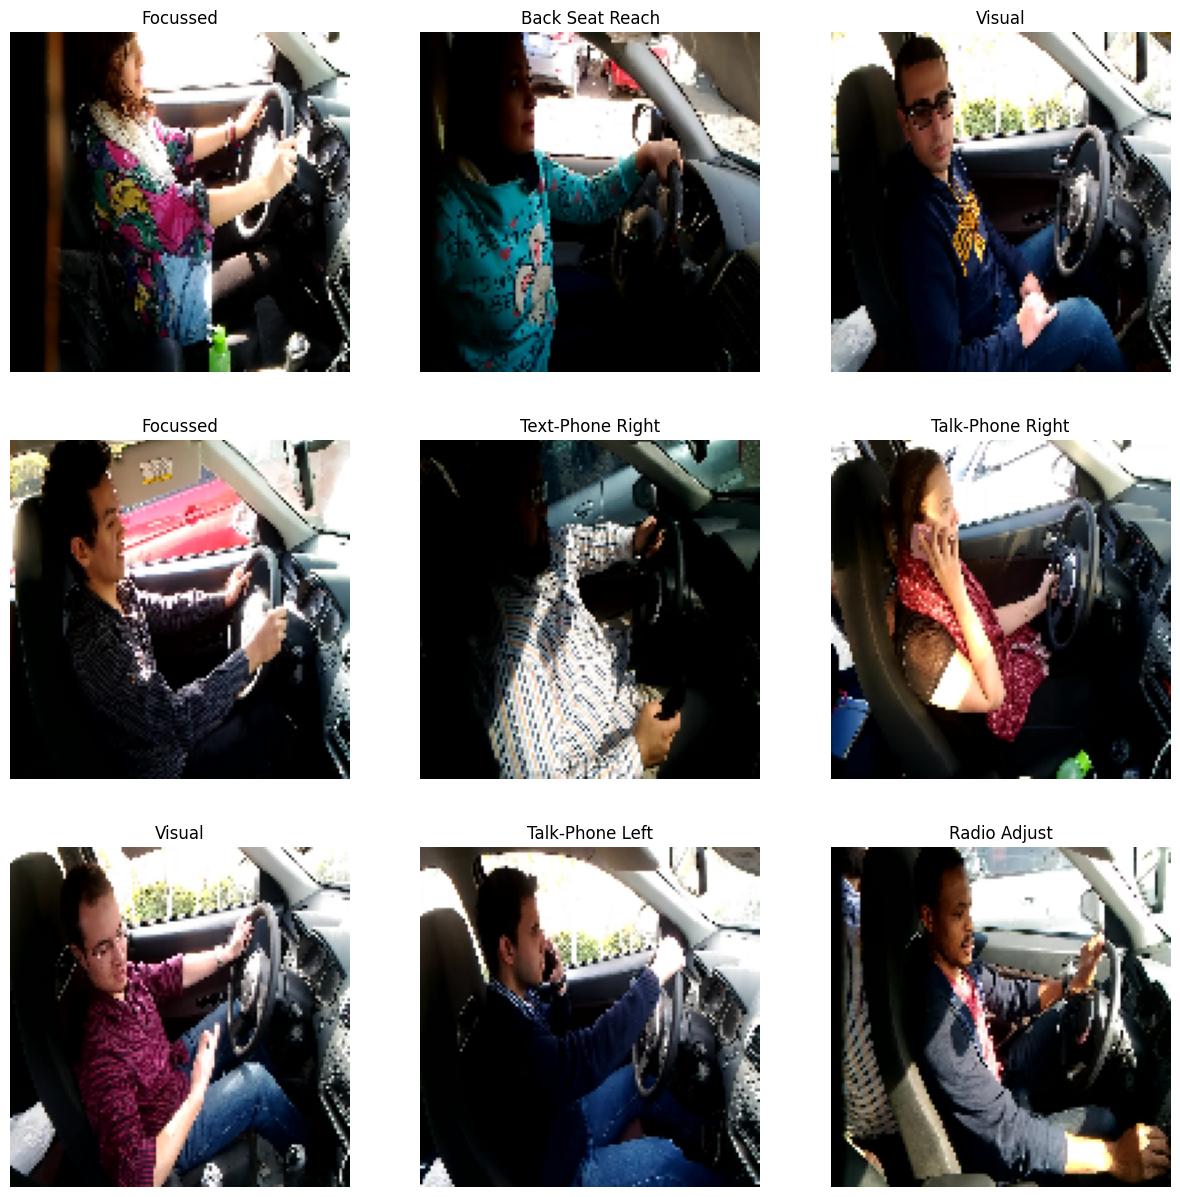

In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
class_names = list(meta.keys())
grid_x = 3
grid_y = 3
plots = grid_x*grid_y
plt.figure(figsize=(grid_y * 5, grid_x * 5))
for images, labels in train_dataset.take(1): 
    for i in range(9): 
        ax = plt.subplot(3, 3, i + 1) 
        plt.imshow((images[i]*255.0).numpy().astype("uint8")) 
        plt.title(meta[class_names[(labels[i])]]) 
        plt.axis("off")

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import regularizers

In [14]:
model = Sequential()

In [15]:

model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=3,  padding="same", activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
optimizerAdam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= optimizerAdam, loss=tf.losses.SparseCategoricalCrossentropy(), metrics= ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [16]:
# # ACTUAL MODEL DONT CHANGE
# model.add(Conv2D(16, 3, activation="relu", kernel_regularizer = regularizers.L2(l2=0.01), padding="same", input_shape = (128, 128, 3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, 3, activation="relu", padding="same"))
# model.add(MaxPooling2D())
# model.add(Conv2D(64, 3, activation="relu", padding="same"))
# model.add(MaxPooling2D())
# model.add(Conv2D(128, 3, activation="relu", padding="same"))
# model.add(MaxPooling2D())
# model.add(Conv2D(64, 3, activation="relu", padding="same"))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(64 ,activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation="relu"))
# model.add(Dense(16, activation="relu"))
# model.add(Dense(10, activation="softmax"))
# optimizerAdam = keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer=optimizerAdam, loss=tf.losses.SparseCategoricalCrossentropy(), metrics= ["accuracy"])
# model.summary()

In [17]:
from keras.callbacks import EarlyStopping
Epoch = 25
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

fitted = model.fit(train_dataset, epochs=Epoch, validation_data=val_dataset)#, class_weight=class_weights_dict)#, callbacks=[early_stopping]) #, class_weight=class_weights_dict

Epoch 1/25


128/128 [==============================] - 95s 734ms/step - loss: 2.0293 - accuracy: 0.2820 - val_loss: 1.3994 - val_accuracy: 0.5230
Epoch 2/25
128/128 [==============================] - 90s 695ms/step - loss: 1.1526 - accuracy: 0.5797 - val_loss: 0.6313 - val_accuracy: 0.8050
Epoch 3/25
128/128 [==============================] - 90s 698ms/step - loss: 0.6664 - accuracy: 0.7648 - val_loss: 0.3474 - val_accuracy: 0.8878
Epoch 4/25
128/128 [==============================] - 97s 748ms/step - loss: 0.4125 - accuracy: 0.8572 - val_loss: 0.2388 - val_accuracy: 0.9246
Epoch 5/25
128/128 [==============================] - 87s 668ms/step - loss: 0.2885 - accuracy: 0.9021 - val_loss: 0.1339 - val_accuracy: 0.9620
Epoch 6/25
128/128 [==============================] - 97s 750ms/step - loss: 0.2189 - accuracy: 0.9262 - val_loss: 0.1233 - val_accuracy: 0.9612
Epoch 7/25
128/128 [==============================] - 100s 771ms/step - loss: 0.1655 - accuracy: 0.9432 - val_loss: 0.0977 - val_accuracy: 0.

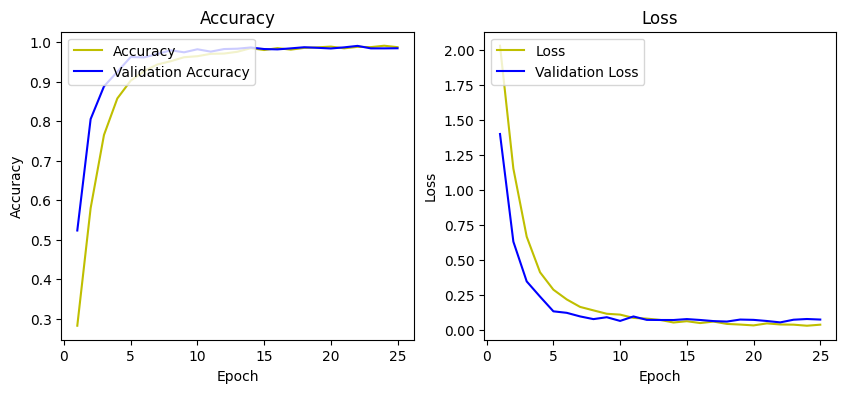

In [18]:
fig = plt.figure(figsize=(10,4))
x_ticks = list(range(1, Epoch+1))
ax = plt.subplot(1,2,1)
plt.plot(x_ticks, fitted.history["accuracy"], color="y", label="Accuracy")
plt.plot(x_ticks, fitted.history["val_accuracy"], color="b", label="Validation Accuracy")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc = "upper left")
ax = plt.subplot(1,2,2)
plt.plot(x_ticks, fitted.history["loss"], color="y", label="Loss")
plt.plot(x_ticks, fitted.history["val_loss"], color="b", label="Validation Loss")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")

plt.legend(loc = "upper left")
plt.show()

In [19]:
model.save('CNN_Models/CNN_AUC_Final.h5')

In [20]:
from sklearn.metrics import accuracy_score
y_test = []
y_pred = []
for images, labels in test_dataset:
    y_test.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
accuracy_str = "Accuracy: {:.4f} ".format(accuracy)

2/2 [==============================] - 0s 32ms/step
0.981651376146789


In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1_str = "F1: {:.4f} ".format(f1)
precision_str = "Precision: {:.4f} ".format(precision)
recall_str = "Recall: {:.4f} ".format(recall)
print(recall_str)
print(f1_str)
print(precision_str)
# roc_auc = roc_auc_score(y_test, y_pred, average="macro", multi_class="ovr")
# false_pos, true_pos, thresh = roc_auc[0]

Recall: 0.9817 
F1: 0.9817 
Precision: 0.9820 


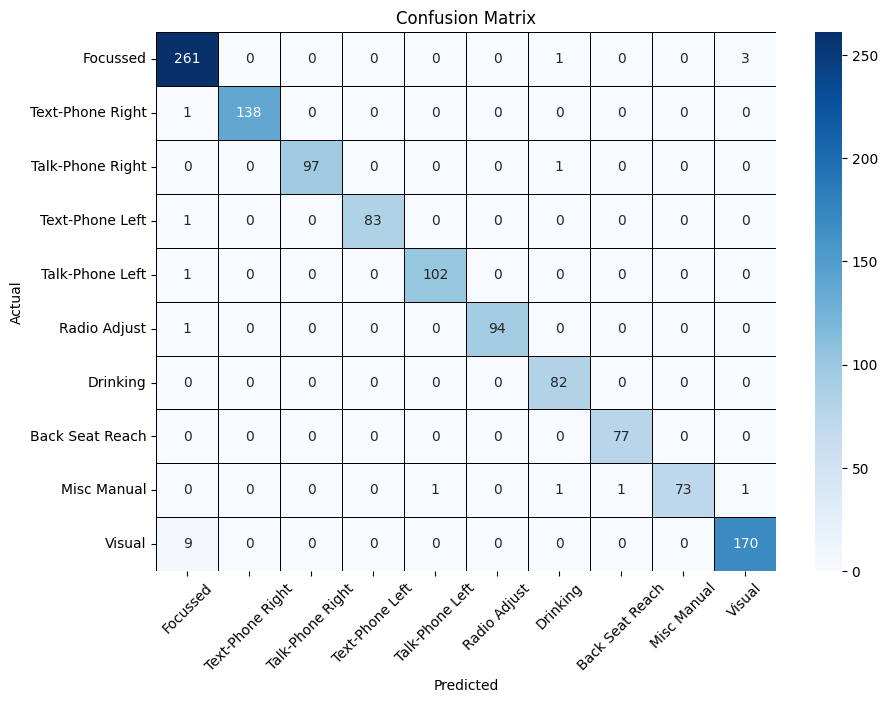

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5, 9.5]
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(confusion, cmap="Blues", annot=True, fmt = ".5g", cbar=True, linewidths = 0.5,linecolor="black")
plt.xticks(ticks=ticks, labels=list(meta.values()), rotation=45)
plt.yticks(ticks=ticks, labels=list(meta.values()), rotation=-0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show() 

In [33]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_pred, labels=[0], average="weighted")
precision = precision_score(y_test, y_pred, labels=[0],average="weighted")
recall = recall_score(y_test, y_pred, labels=[0], average="weighted")
f1_str = "F1: {:.4f} ".format(f1)
precision_str = "Precision: {:.4f} ".format(precision)
recall_str = "Recall: {:.4f} ".format(recall)
print(recall_str)
print(f1_str)
print(precision_str)

Recall: 0.9849 
F1: 0.9685 
Precision: 0.9526 


In [24]:
from keras.preprocessing import image

import numpy as np


In [25]:
image_folder_path = r"C:/Users/james/Desktop/Diss_project_code/state-farm-distracted-driver-detection/imgs/Unlabled/"
testing = image_dataset_from_directory(image_folder_path,
                                             label_mode=None,
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE)
def normalize(image):
    image = tf.cast(image/255.0, tf.float32)
    return image
testing = testing.map(normalize)


Found 79726 files belonging to 1 classes.


2/2 [==============================] - 0s 31ms/step


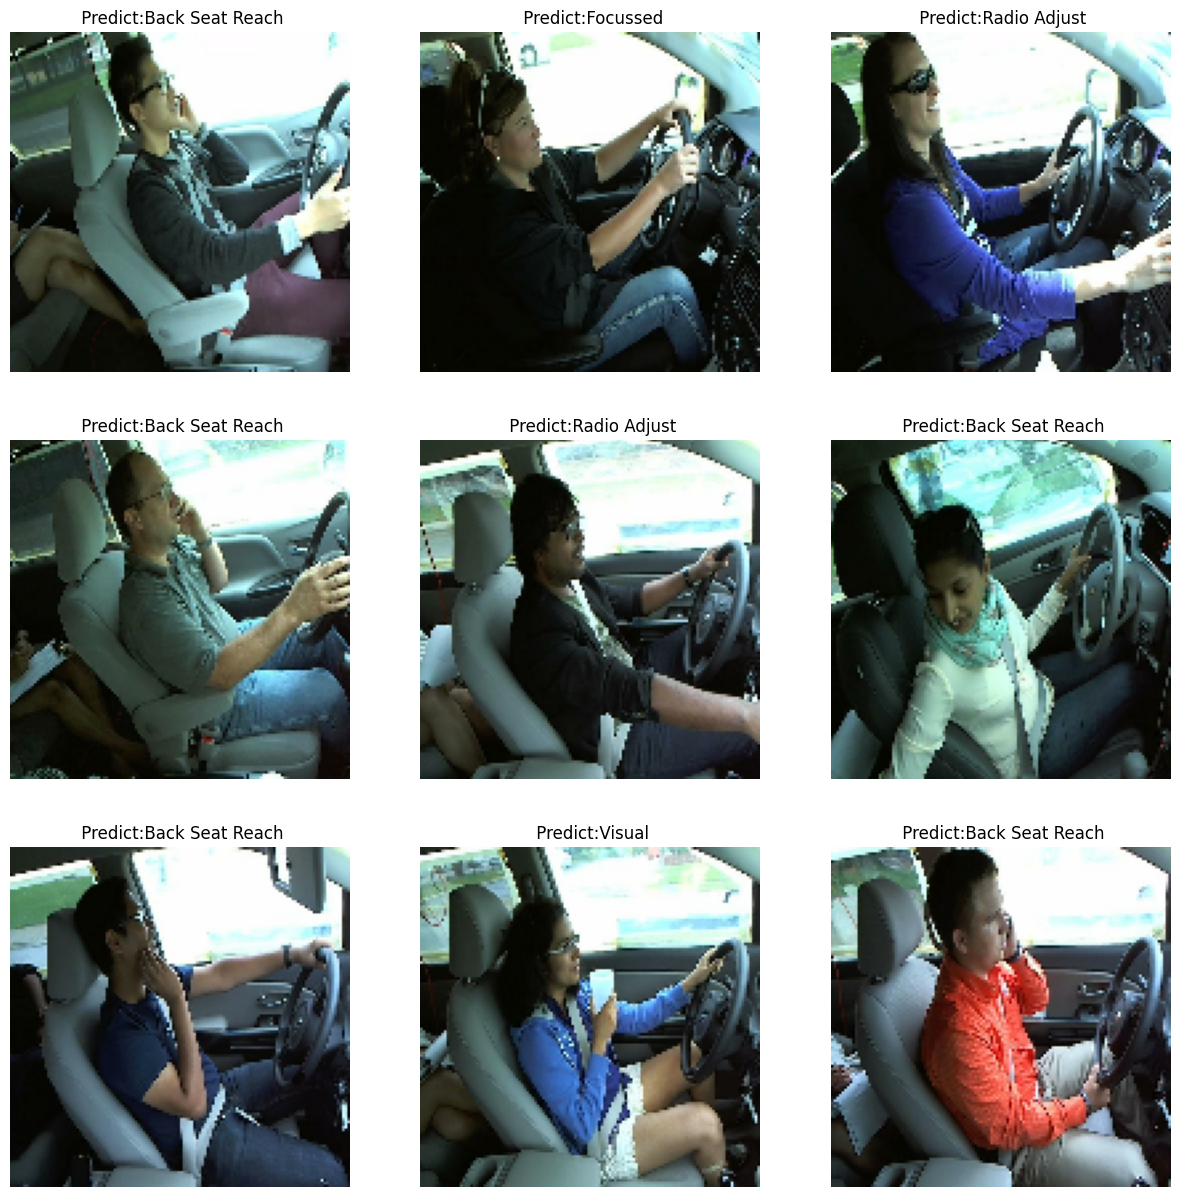

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf

keys = list(meta.keys())
new_test = testing.take(10)
index = [0,1,2,3,4,5,6,7,8,9]
x_ticks = list(meta.values())

grid_x = 3
grid_y = 3
plots = grid_x*grid_y

plt.figure(figsize=(grid_y * 5, grid_x * 5))

for images in new_test:
    predictions = model.predict(images)
    max_prob = []
    for i in predictions:
        max_prob.append(np.argmax(i))
    for i in range(plots):
        ax = plt.subplot(grid_x, grid_y, i + 1)
        plt.imshow((images[i]*255).numpy().astype("uint8"))
        plt.title(" Predict:" + meta[keys[int(max_prob[i])]])
        plt.axis("off")

plt.show()